# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nadif Aulia Putra
- **Email:** thenadif@gmail.com
- **ID Dicoding:** ___nadif

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi tingkat kualitas udara berdasarkan waktu dalam rentang sehari?
- Bagaimana variasi tingkat kualitas udara berdasarkan waktu dalam rentang seminggu?
- Apa hubungan antara kecepatan angin (WSPM) dan konsentrasi polutan (misalnya, PM2.5, PM10, SO2)?

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Memanggil  library yang dibutuhkan dalam analisis data ini

## Data Wrangling

### Gathering Data

In [49]:
nongzhanguan_df = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- Memuat dataset

### Assessing Data

In [50]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [51]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [52]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())



Jumlah duplikasi:  0


In [53]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

In [54]:
nongzhanguan_df = nongzhanguan_df.infer_objects(copy=False)
nongzhanguan_df.interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_16632\3431348649.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nongzhanguan_df.interpolate(method='linear', limit_direction='forward', inplace=True)


**Insight:**
- Menerapkan interpolasi pada semua kolom numerik

In [55]:

numeric_columns = nongzhanguan_df.select_dtypes(include=[np.number]).columns
nongzhanguan_df[numeric_columns] = nongzhanguan_df[numeric_columns].fillna(nongzhanguan_df[numeric_columns].mean())

- Mengisi nilai kosong dibanding men-drop / menghapus baris untuk menghindari kehilangan data yang signifikan

## Exploratory Data Analysis (EDA)

### Explore ...

In [56]:


# Menambahkan kolom 'hour' dan 'day_of_week'
nongzhanguan_df['datetime'] = pd.to_datetime(nongzhanguan_df[['year', 'month', 'day', 'hour']])
nongzhanguan_df.set_index('datetime', inplace=True)
nongzhanguan_df['hour'] = nongzhanguan_df.index.hour
nongzhanguan_df['day_of_week'] = nongzhanguan_df.index.dayofweek  # Senin = 0, Minggu = 6

# Mengelompokkan berdasarkan jam dalam sehari dan menghitung rata-rata level polutan
hourly_pollution = nongzhanguan_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Mengelompokkan berdasarkan hari dalam seminggu dan menghitung rata-rata level polutan
weekly_pollution = nongzhanguan_df.groupby('day_of_week')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Menggunakan loop untuk menghasilkan plot serupa untuk polutan yang berbeda agar mengurangi pengulangan kode
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']





**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana variasi tingkat kualitas udara berdasarkan waktu dalam rentang sehari?

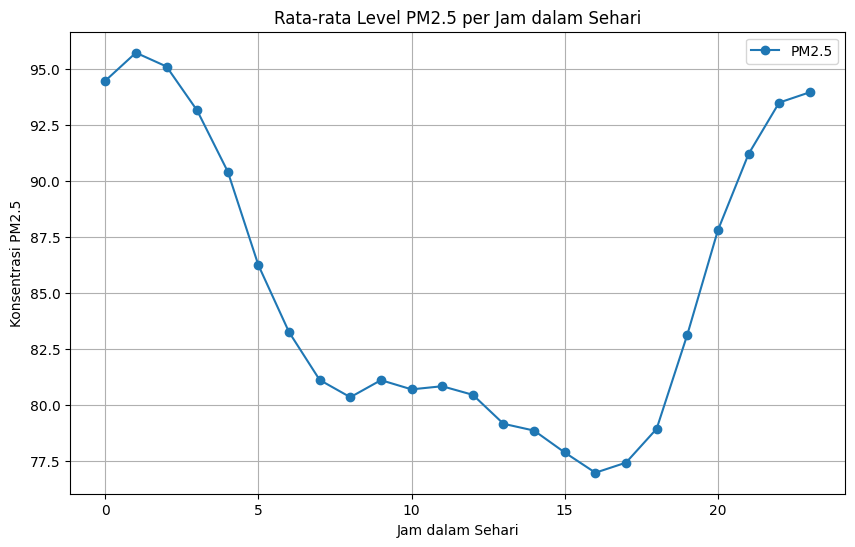

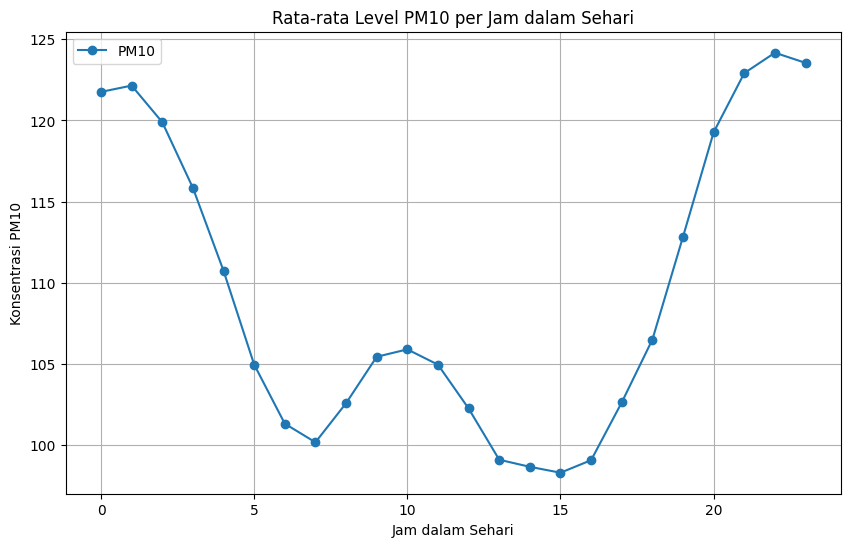

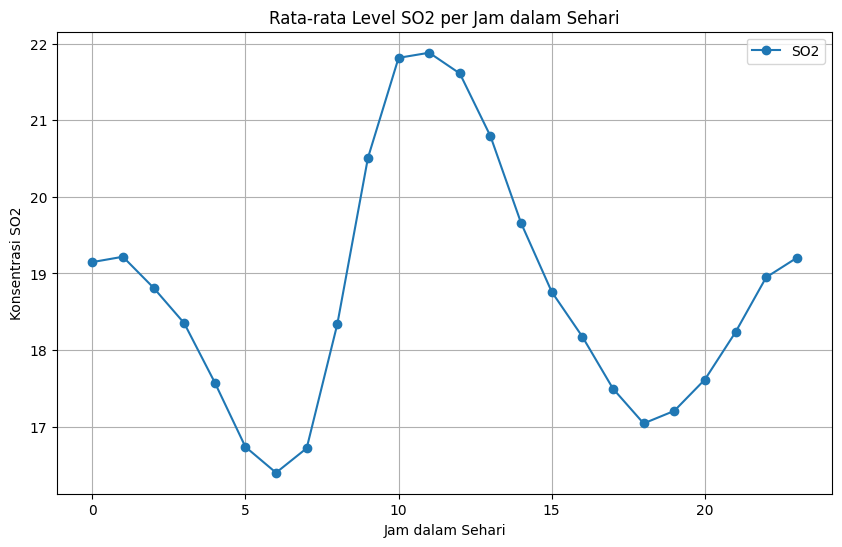

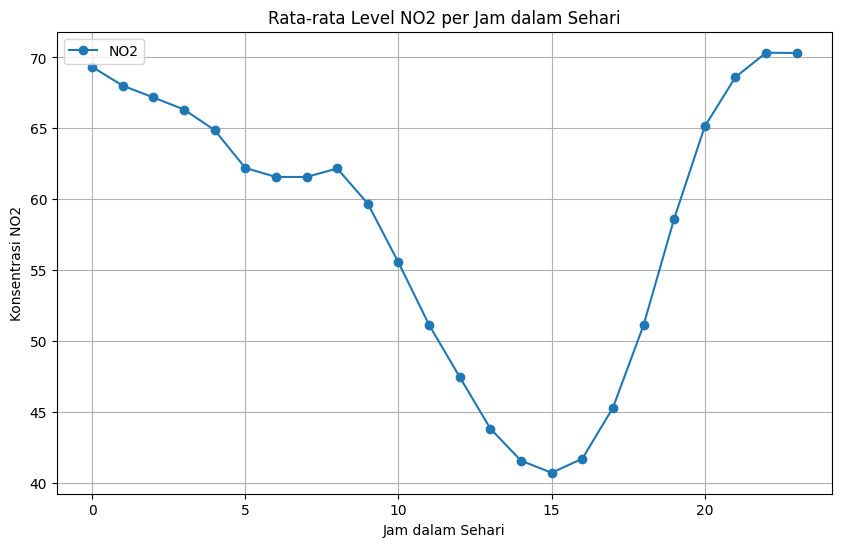

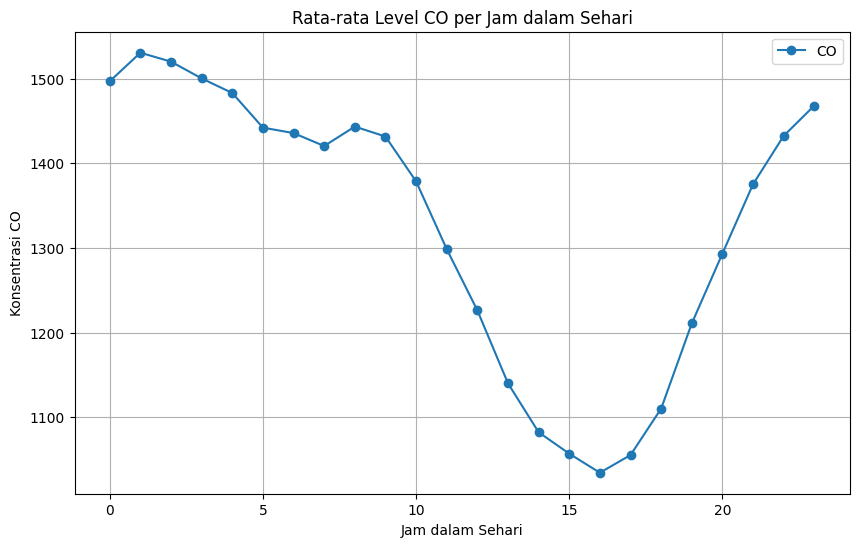

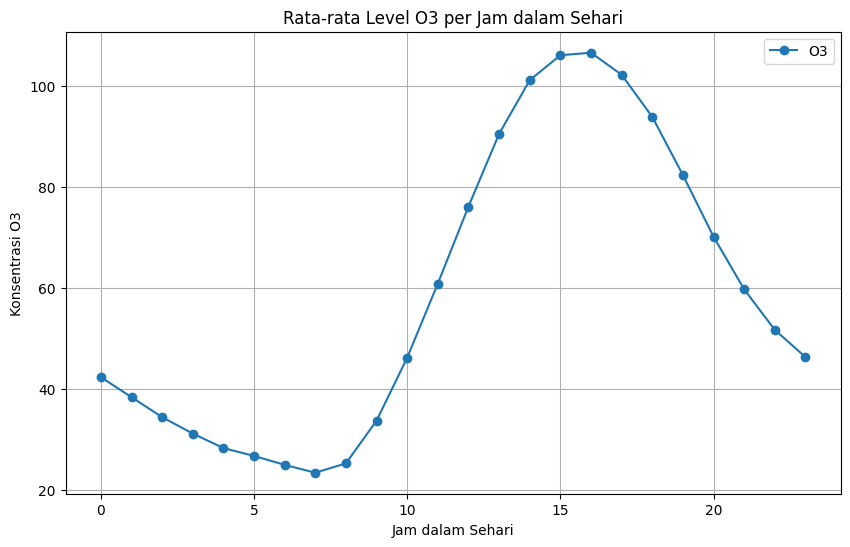

In [57]:
# Plot variasi per jam untuk setiap polutan
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_pollution.index, hourly_pollution[pollutant], marker='o', label=pollutant)
    plt.title(f'Rata-rata Level {pollutant} per Jam dalam Sehari')
    plt.xlabel('Jam dalam Sehari')
    plt.ylabel(f'Konsentrasi {pollutant}')
    plt.grid(True)
    plt.legend()
    plt.show()



### Pertanyaan 2: Bagaimana variasi tingkat kualitas udara berdasarkan waktu dalam rentang seminggu?

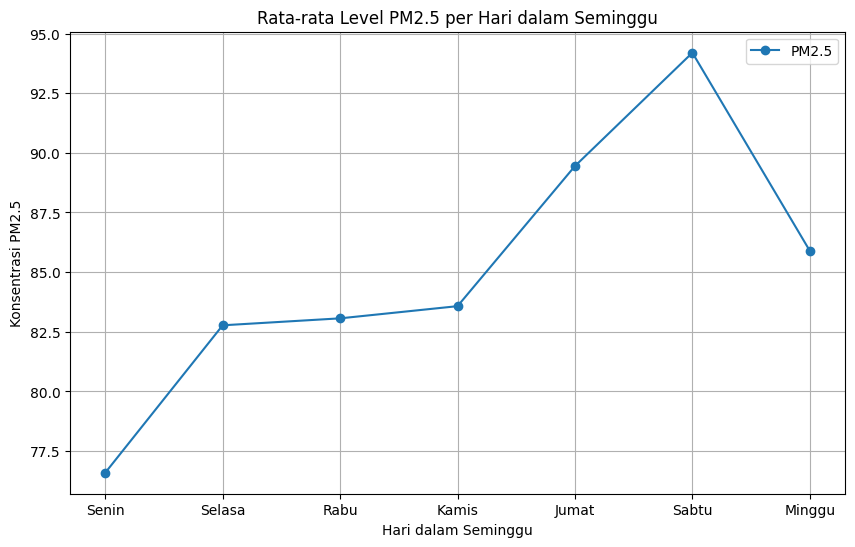

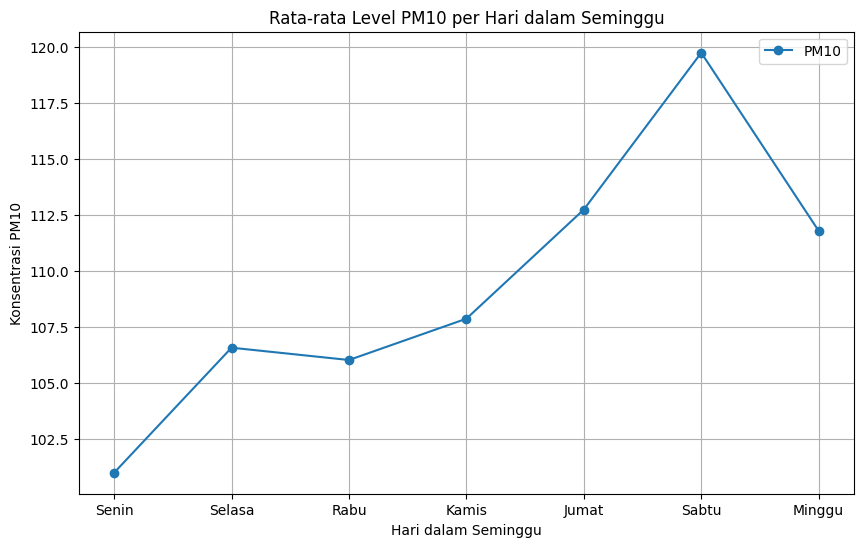

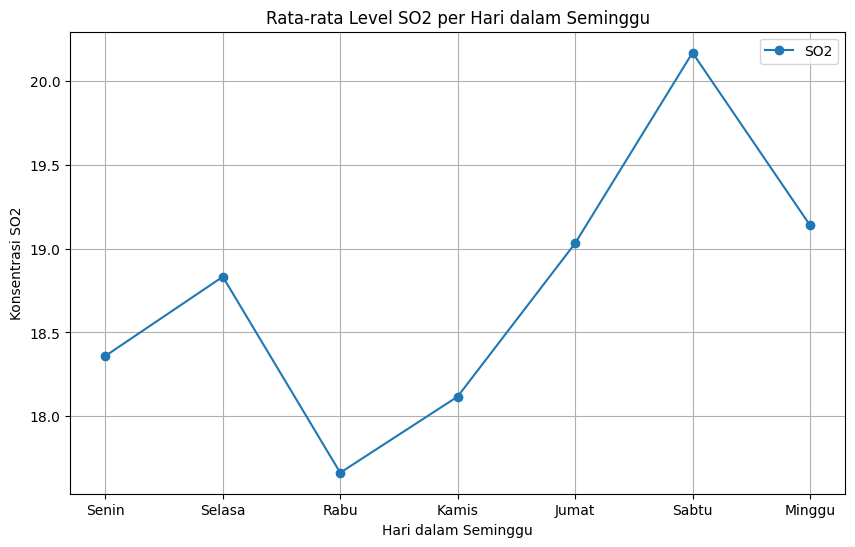

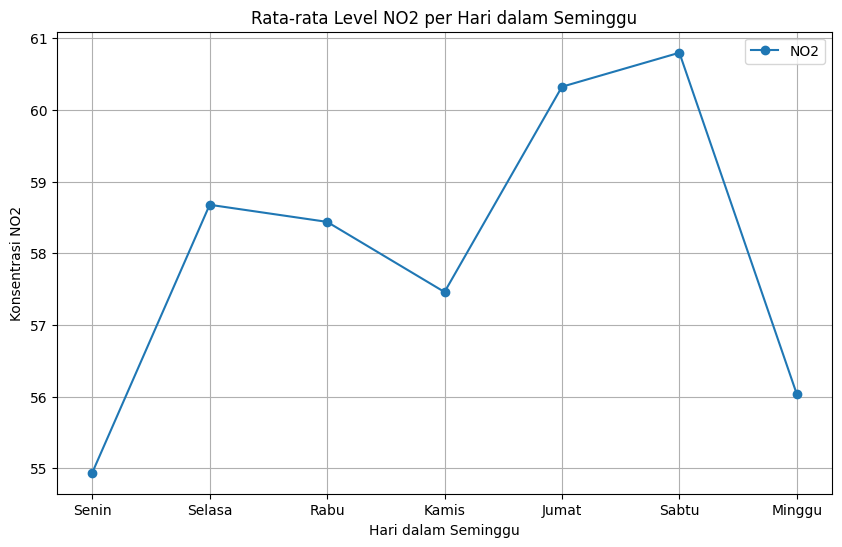

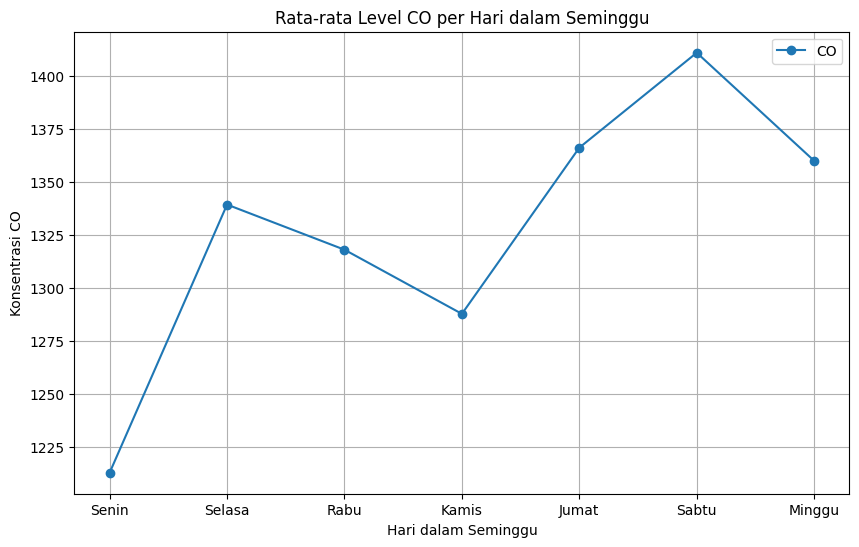

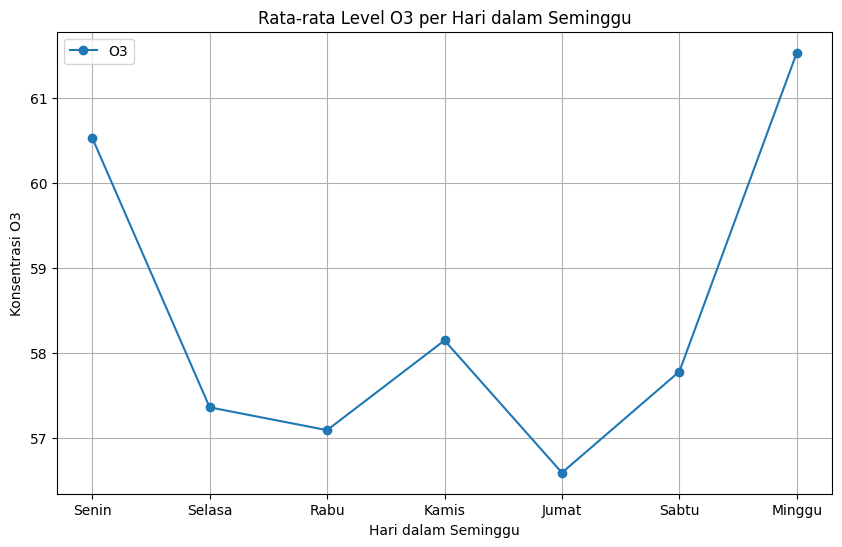

In [58]:
# Plot variasi per minggu untuk setiap polutan
hari_dict = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_pollution.index, weekly_pollution[pollutant], marker='o', label=pollutant)
    plt.title(f'Rata-rata Level {pollutant} per Hari dalam Seminggu')
    plt.xlabel('Hari dalam Seminggu')
    plt.xticks(ticks=weekly_pollution.index, labels=[hari_dict[i] for i in weekly_pollution.index])
    plt.ylabel(f'Konsentrasi {pollutant}')
    plt.grid(True)
    plt.legend()
    plt.show()



**Insight:**
- xxx
- xxx

### Pertanyaan 3: Apa hubungan antara kecepatan angin (WSPM) dan konsentrasi polutan (misalnya, PM2.5, PM10, SO2)?

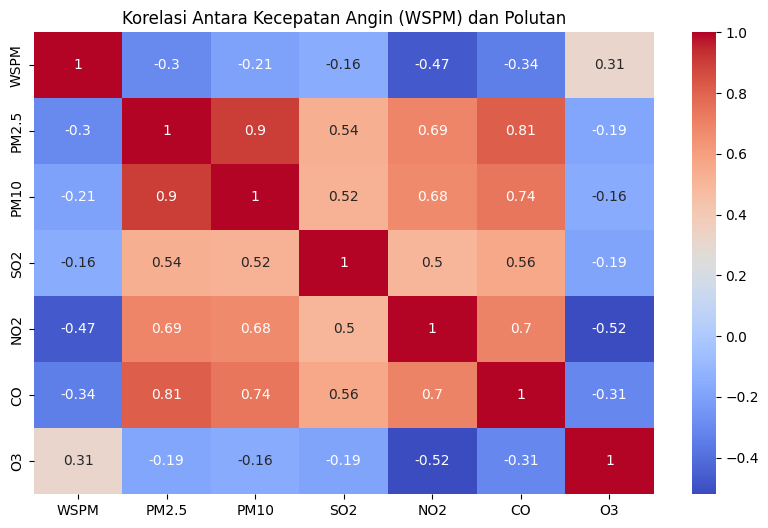

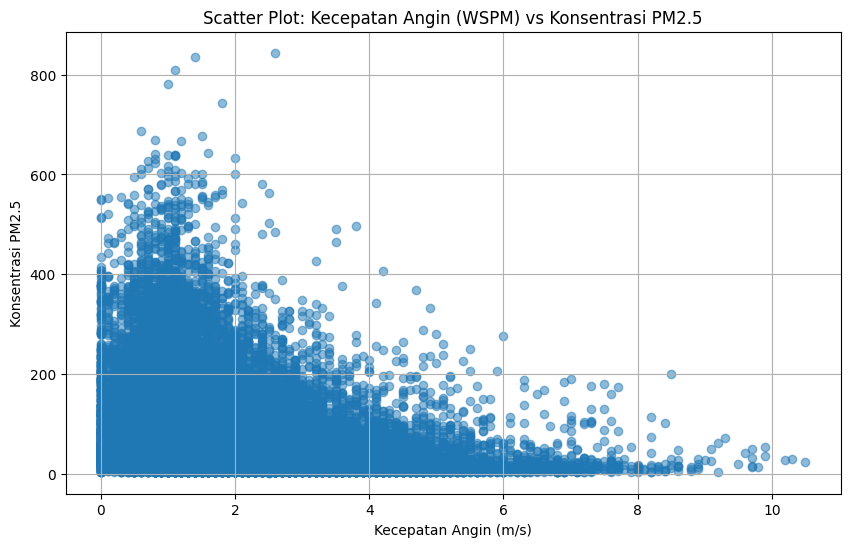

In [59]:
# Menganalisis hubungan antara kecepatan angin dan polutan
wind_pollution_corr = nongzhanguan_df[['WSPM', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(wind_pollution_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Kecepatan Angin (WSPM) dan Polutan')
plt.show()

# Plot WSPM vs PM2.5 untuk memeriksa hubungan secara visual
plt.figure(figsize=(10, 6))
plt.scatter(nongzhanguan_df['WSPM'], nongzhanguan_df['PM2.5'], alpha=0.5)
plt.title('Scatter Plot: Kecepatan Angin (WSPM) vs Konsentrasi PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2